OBJECTIVE/INSTRUCTION
Problematic to solve and the final objective.
Risk Assessment:
Identify High-Risk Individuals: Predictive models help in identifying individuals with a higher likelihood of experiencing a stroke based on various risk factors like hypertension, diabetes, smoking habits, and more.

Early Intervention: Early identification of individuals at risk allows for timely interventions and lifestyle modifications to reduce the risk of stroke occurrence.

Healthcare Improvement:
Enhanced Patient Care: Understanding the predictive factors aids healthcare providers in offering personalized care and tailored interventions to high-risk individuals.

Resource Allocation: Identifying high-risk groups helps in allocating healthcare resources more effectively, optimizing care for those who need it most.

Research and Development:
Insight Generation: Analyzing stroke prediction datasets helps in understanding the interplay of different risk factors and their impact on stroke occurrence.

Model Improvement: Working on these datasets allows for the development and enhancement of predictive models to improve their accuracy and reliability.

Public Health Initiatives:
Preventive Measures: Insights from predictive models guide public health initiatives aimed at preventing strokes by promoting healthier lifestyles, awareness campaigns, and targeted interventions.

Policy Formulation: Data analysis on stroke prediction contributes to forming policies focusing on stroke prevention and management, aiming to reduce the overall burden of strokes in a population.

Patient Empowerment:
Education and Awareness: Using the information derived from predictive models, individuals can be educated about the importance of lifestyle changes, regular health check-ups, and early intervention in reducing stroke risks.
Ethical Considerations:
Data Privacy and Security: Ensuring that the data used for prediction models is handled ethically and securely to protect patient privacy and confidentiality.
Equity and Fairness: Ensuring that predictive models are fair and unbiased, considering diverse populations and avoiding discrimination based on demographics or other factors.
Overall, working on stroke prediction datasets aims to harness the power of data to proactively address stroke risks, improve patient care, guide policy decisions, and promote healthier living, ultimately reducing the incidence and impact of strokes in communities.

Data Source
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data

In [78]:
import pandas as pd
import numpy as np
# import streamlit as st
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [79]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [80]:
df = data.copy()

In [81]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [83]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [84]:
# clean data
def cleaner(dataframe):
    for i in dataframe.columns:
        if (dataframe[i].isnull().sum()/len(dataframe) * 100) > 30:
            dataframe.drop(i, inplace = True, axis = 1)

        elif dataframe[i].dtypes != 'O':
            dataframe[i].fillna(dataframe[i].median(), inplace = True)

        else:
            dataframe[i].fillna(dataframe[i].mode()[0], inplace = True)

    (dataframe.isnull().sum().sort_values(ascending = False).head())
    return dataframe

cleaner(df)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [85]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [86]:
categoricals = df.select_dtypes(include = ['object', 'category'])
numericals = df.select_dtypes(include = 'number')

display(categoricals.head(3))
display(numericals.head(3))

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,28.1,1
2,31112,80.0,0,1,105.92,32.5,1


In [87]:
df.drop('id', axis = 1, inplace = True)

In [88]:
# Transform data
scaler = StandardScaler()
encoder = LabelEncoder()

for i in numericals.columns: 
    if i in df.drop('stroke', axis = 1).columns: 
        df[i] = scaler.fit_transform(df[[i]]) 
for i in categoricals.columns:
    if i in df.drop('stroke', axis = 1).columns: 
        df[i] = encoder.fit_transform(df[i])

y = df['stroke']
x = df.drop('stroke',axis = 1)

In [89]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,1.051434,-0.328602,4.185032,1,2,1,2.706375,1.005086,1
1,0,0.786070,-0.328602,-0.238947,1,3,0,2.121559,-0.098981,2
2,1,1.626390,-0.328602,4.185032,1,2,0,-0.005028,0.472536,2
3,0,0.255342,-0.328602,-0.238947,1,2,1,1.437358,0.719327,3
4,0,1.582163,3.043196,-0.238947,1,3,0,1.501184,-0.631531,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,1.626390,3.043196,-0.238947,1,2,1,-0.494658,-0.098981,2
5106,0,1.670617,-0.328602,-0.238947,1,3,1,0.420775,1.446713,2
5107,0,-0.363842,-0.328602,-0.238947,1,3,0,-0.511443,0.225745,2
5108,1,0.343796,-0.328602,-0.238947,1,2,0,1.328257,-0.423706,1


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

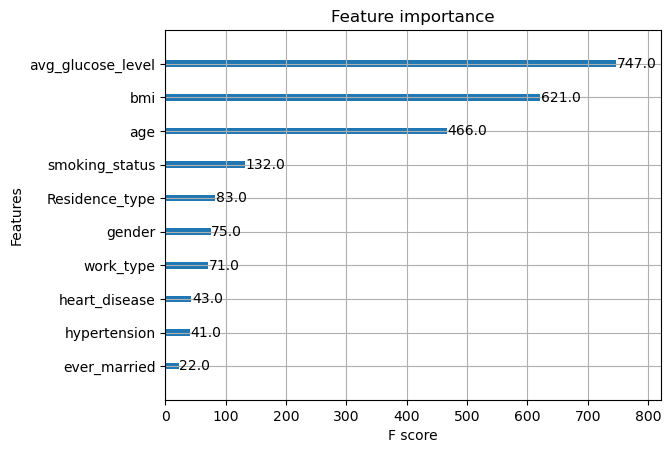

In [90]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model)

In [91]:
#----------Feature Selection--------
sel_cols = ['avg_glucose_level', 'bmi', 'age', 'smoking_status', 'Residence_type', 'gender', 'work_type']
x = df[sel_cols]

In [92]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 75, stratify = y)

In [93]:
def modeller(x_train, y_train, x_test, y_test, show_train_score = None):
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.tree import DecisionTreeRegressor
    from xgboost import XGBRegressor
    from sklearn.svm import SVC
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score

    # list of algorithms to be used
    algorithms = [RandomForestRegressor(), XGBRegressor(), DecisionTreeRegressor(), SVC(kernel = 'poly'), LinearRegression()]

    # keep the training and test scores
    scores = []
    train_validator = []

    for i in algorithms:
        model_name = i
        model_name.fit(x_train, y_train)
        model_validate = model_name.predict(x_train)
        train_validator.append(r2_score(model_validate, ytrain))

        test_perf = model_name.predict(x_test)
        scores.append(r2_score(test_perf, y_test))

    # create a table for each algorithms and scores
    compare_table = pd.DataFrame()
    compare_table['Algorithm'] = pd.Series(algorithms)
    compare_table['Accuracy'] = pd.Series(scores)

    if show_train_score == 'show_train':
        compare_table['Training Accuracy'] = pd.Series(train_validator)
        return compare_table.sort_values(by = 'Accuracy', ascending = False), compare_table['Algorithm'][0], compare_table['Algorithm'][1]
    else:
        return compare_table.sort_values(by = 'Accuracy', ascending = False), compare_table['Algorithm'][0], compare_table['Algorithm'][1]

In [94]:
table, model1, model2 = modeller(xtrain, ytrain, xtest, ytest, 'show_train')
table

,Algorithm,Accuracy,Training Accuracy
3,SVC(kernel='poly'),0.000000,0.000000
2,DecisionTreeRegressor(),-0.836415,1.000000
1,"XGBRegressor(base_score=None, booster=None, ca...",-2.048414,0.894564
0,"(DecisionTreeRegressor(max_features=1.0, rando...",-4.042847,0.708969
4,LinearRegression(),-11.590710,-11.566823


<Axes: xlabel='stroke', ylabel='count'>

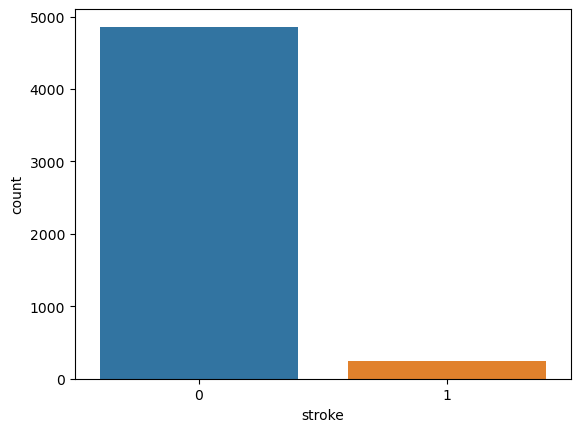

In [95]:
sns.countplot(x = y)

<Axes: xlabel='stroke', ylabel='count'>

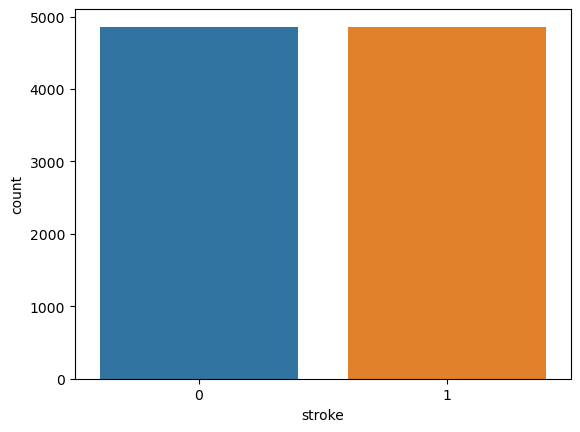

In [96]:
# %pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
import pandas as pd
import seaborn as sns

# Assuming you have a Datadf df with features (x) and target variable (y)
# Replace 'Diabetes' with the actual name of your target variable

# Extract features (x) and target variable (y)
y = df.stroke
x = df.drop('stroke', axis=1)

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto',  random_state=42)  # You can adjust the sampling_strategy as needed

# Apply SMOTE to generate synthetic samples
x_resampled, y_resampled = smote.fit_resample(x, y)

# Create a new Datadf with the resampled data
ds = pd.concat([pd.DataFrame(x_resampled, columns=x.columns), pd.Series(y_resampled, name='stroke')], axis=1)

# Plot the count of samples for each class in the resampled data
sns.countplot(x=ds['stroke'])

In [97]:
# Modelling
model = RandomForestClassifier() 
model.fit(xtrain, ytrain) 
cross_validation = model.predict(xtrain)
pred = model.predict(xtest) 

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 9, stratify = y)

In [98]:
# Modelling
model = RandomForestClassifier() 
model.fit(xtrain, ytrain) 
cross_validation = model.predict(xtrain)
pred = model.predict(xtest) 

In [99]:
model = pickle.dump(model, open('healthcare(stroke).pkl', 'wb'))
print('\nModel is saved\n')


Model is saved



Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient